In [1]:
import iisignature as iis
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
path = "../Data/data_merged_20250922.parquet"

sel = [("type","==",0),("annee",">=",2012)]

col = ["inscrits",
           "pvoteppar", 'codecommune', "annee", "pvotepreviousppar", "pvotepreviouspreviousppar", "pvotepreviouspreviouspvoteC", "pvotepreviouspreviouspvoteCD", "pvotepreviouspreviouspvoteCG", "pvotepreviouspreviouspvoteD", "pvotepreviouspreviouspvoteG", "pvotepreviouspvoteC", "pvotepreviouspvoteCD", "pvotepreviouspvoteCG", "pvotepreviouspvoteD", "pvotepreviouspvoteG", "pvotepvoteD",
           "popcommunes/pop", "popcommunesvbbm/vbbm",
           "agesexcommunes/prop014","agesexcommunes/prop60p","agesexcommunes/perage",
           "diplomescommunes/pbac", "diplomescommunes/psup", "diplomescommunes/nodip",
           "cspcommunes/pouvr","cspcommunes/pcadr","cspcommunes/pchom",
           "revcommunes/revratio",
           "naticommunes/pimmigre"]

data = pd.read_parquet(path,engine='pyarrow',columns=col,filters=sel)

In [3]:
level = 1   # Signature level
sig = {}

for commune in data['codecommune'].unique():
    mat = data[data['codecommune'] == commune]
    mat = mat.sort_values('annee')
    mat = mat.drop(['annee','codecommune'],axis=1)
    sig[commune] = iis.sig(mat.to_numpy(np.float64),level)

TypeError: 'builtin_function_or_method' object is not iterable

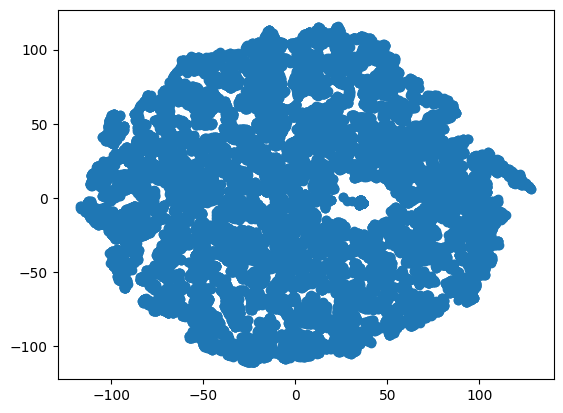

In [4]:
codes = sig.keys
Xd = pd.DataFrame(sig).T
Xd = Xd.dropna(axis=0)
X = Xd.to_numpy()
X_embedded = TSNE(n_components=2,perplexity=30).fit_transform(X)

plt.scatter(X_embedded[:,0],X_embedded[:,1])
for (x, y), code in zip(X_embedded, codes):
    plt.text(x, y, code)

plt.show()